**Aim: Develop RNN model for Cryptocurrency pricing prediction or text sentiment analysis**

Objectives: 
1. To learn RNN 
2. To learn and implement LSTM

Theory: 

RNN 

A recurrent neural network (RNN) is a class of artificial neural networks where connections between 
nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic 
behavior. Derived from feedforward neural networks, RNNs can use their internal state (memory) to 
process variable length sequences of inputs. This makes them applicable to tasks such as 
unsegmented, connected handwriting recognition[4] or speech recognition.  
The term “recurrent neural network” is used indiscriminately to refer to two broad classes of 
networks with a similar general structure, where one is finite impulse and the other is infinite 
impulse. Both classes of networks exhibit temporal dynamic behavior.  A finite impulse recurrent 
network is a directed acyclic graph that can be unrolled and replaced with a strictly feedforward 
neural network, while an infinite impulse recurrent network is a directed cyclic graph that cannot be 
unrolled.

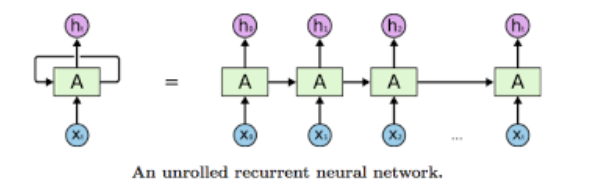
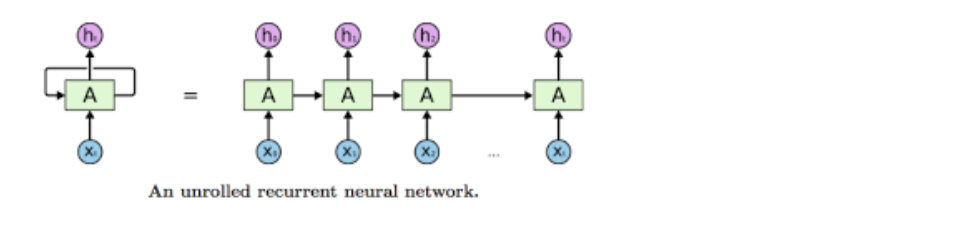

LSTM 

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in 
the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback 
connections. It can not only process single data points (such as images), but also entire sequences of 
data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, 
connected handwriting recognition, speech recognition and anomaly detection in network traffic or 
IDSs (intrusion detection systems). 
A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell 
remembers values over arbitrary time intervals and the three gates regulate the flow of information 
into and out of the cell. 
LSTM networks are well-suited to classifying, processing and making predictions based on time 
series data, since there can be lags of unknown duration between important events in a time series. 
LSTMs were developed to deal with the vanishing gradient problem that can be encountered when 
training traditional RNNs. Relative insensitivity to gap length is an advantage of LSTM over 
RNNs, hidden Markov models and other sequence learning methods in numerous applications.

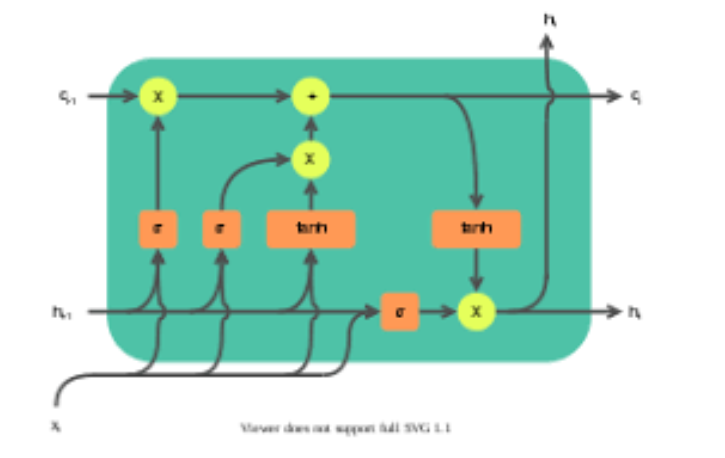


BPTT 

Backpropagation refers to two things: 

• The mathematical method used to calculate derivatives and an application of the derivative 
chain rule. 

• The training algorithm for updating network weights to minimize error. 
It is this latter understanding of backpropagation that we are using here. 
The goal of the backpropagation training algorithm is to modify the weights of a neural network in 
order to minimize the error of the network outputs compared to some expected output in response 
to corresponding inputs. 
It is a supervised learning algorithm that allows the network to be corrected with regard to the 
specific errors made. 
The general algorithm is as follows: 
1. Present a training input pattern and propagate it through the network to get an output. 
2. Compare the predicted outputs to the expected outputs and calculate the error. 
3. Calculate the derivatives of the error with respect to the network weights. 
4. Adjust the weights to minimize the error. 
5. Repeat.

GRU

Gated recurrent units (GRUs) are a gating mechanism in recurrent neural networks, introduced in 
2014 by Kyunghyun Cho et al. The GRU is like a long short-term memory (LSTM) with a forget 
gate, but has fewer parameters than LSTM, as it lacks an output gate. GRU's performance on certain 
tasks of polyphonic music modeling, speech signal modeling and natural language processing was 
found to be similar to that of LSTM. GRUs have been shown to exhibit better performance on certain 
smaller and less frequent datasets.

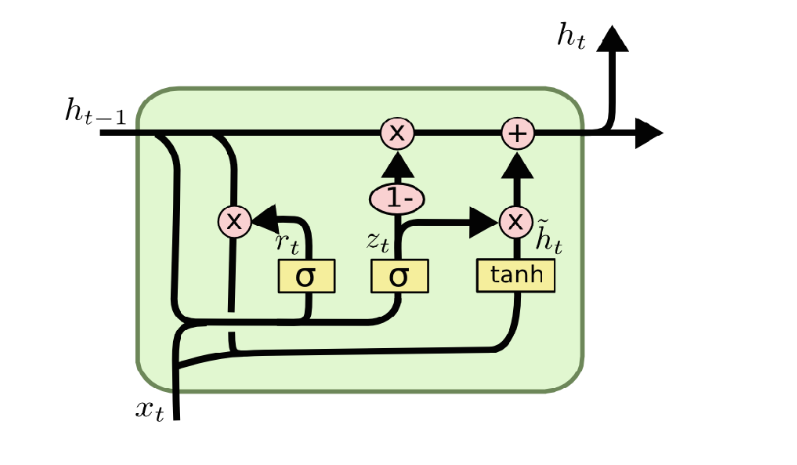

Bi directional RNN 
Bidirectional recurrent neural networks(RNN) are really just putting two independent RNNs 
together. The input sequence is fed in normal time order for one network, and in reverse time order 
for another. The outputs of the two networks are usually concatenated at each time step, though 
there are other options, e.g. summation. 
This structure allows the networks to have both backward and forward information about the 
sequence at every time step. The concept seems easy enough. But when it comes to actually 
implementing a neural network which utilizes bidirectional structure, confusion arises... 
The first confusion is about the way to forward the outputs of a bidirectional RNN to a dense neural 
network.  
The second confusion is about the returned hidden states. In seq2seq models, we’ll want hidden 
states from the encoder to initialize the hidden states of the decoder. Intuitively, if we can only 
choose hidden states at one time step(as in PyTorch), we’d want the one at which the RNN just 
consumed the last input in the sequence. But if the hidden states of time step n (the last one) are 
returned, as before, we’ll have the hidden states of the reversed RNN with only one step of inputs 
seen. 

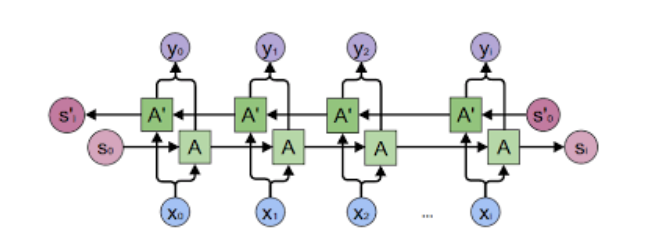


Code:

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.keras.models import Sequential, Model


In [4]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5) 
 
rcParams['figure.figsize'] = 14, 8 
 
RANDOM_SEED = 42 

In [8]:
df = pd.read_csv("BTC-USD.csv", parse_dates=['date'])

In [11]:
def to_sequences(data, seq_len): 
    d = [] 
    for index in range(len(data) - seq_len): 
        d.append(data[index: index + seq_len]) 
 
    return np.array(d)

In [13]:
def preprocess(data_raw, seq_len, train_split): 
    data = to_sequences(data_raw, seq_len) 
    num_train = int(train_split * data.shape[0]) 
    X_train = data[:num_train, :-1, :] 
    y_train = data[:num_train, -1, :] 
    X_test = data[num_train:, :-1, :] 
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test 

In [19]:
plt.show()